# PyTorch Workflow

Let's explore a an example PyTorch end-toend workflow.

Resources:
* Ground truth notework - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Bookversion of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating the model (inference)",
                      5: "saving and loading the model",
                      6: "putting it al together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating the model (inference)',
 5: 'saving and loading the model',
 6: 'putting it al together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural network
import matplotlib.pyplot as plt

# Check PyTorch version
print(torch.__version__)


2.7.1+cu118


## 1. Data (preparing and Loading)

Data can almost anything... in Machine Learning

* Excel speadsheet
* Images of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.



In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02 # Gap
X = torch.arange(start, end, step).unsqueeze(dim=1) # unsqueeze adds a dimension
y = weight * X + bias

X[:10] , y[:10], len(X), len(y) # Show first 10 values of X and y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting data into training and testing sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with out data.


In [4]:
# Crate a train/test split
train_split = int(0.8 * len(X)) # 80% of data for training
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better Visualize out data?

This is where that data explorer's motto comes in!
"Visualize, Visualize, and Visualize!!"

In [7]:
def plot_predictions(train_data=X_train,
                    train_lables=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """
    Plots training data, test data and compares predictions.
    """

    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_lables, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=10, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot predictions in red if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

    

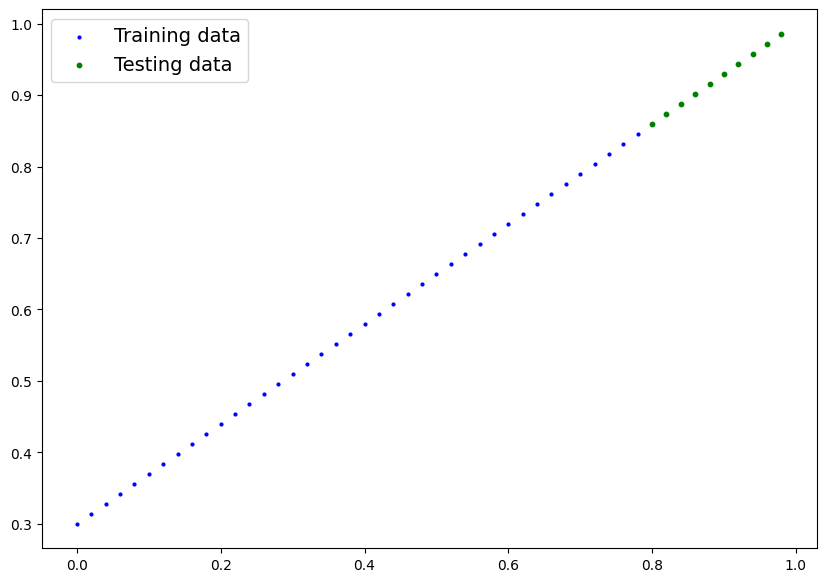

In [8]:
plot_predictions();

## 2. Build model

Our first PyTorch Model!

This is very exciting... let's do it!

What our model does:
* Start with random values (weight & bias)
* Look at traiing daa and adjust the random values to better represent (or get closer to) the ideal values (the 
* weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:

Through two main algorithms:
1. Gradient descent
2. Backpropagation



In [ ]:
from torch import nn


# Create linear regression model class
class LinearRegressionModel(nn.Module):  # <- almost everything in PyToch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float
        ))

        self.bias = nn.Parameter(
            torch.randn(1, requires_grad=True, dtype=torch.float
        ))

    # Forward method to define the compuation in the model
    def forward(self, x:torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weight * x + self.bias # this is the linear regression equation y = wx + b


### PyTorcg model building essentials

* torch.nn - contains all of the buildings block for computational graphs (a neural network can be consider as the computational graph).
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward().